In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import io
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from PIL import Image
from google.colab import files

# **Import Dataset Image**

looping import image

In [2]:
def load_images(directory):
  images = []
  for filename in os.listdir(directory):

      img = Image.open(os.path.join(directory, filename))
      img = img.resize((224,224))
      img = img.convert('RGB')
      img = np.array(img) / 255
      images.append(img)
  return images

In [3]:
tumor_images = load_images('/content/drive/MyDrive/Dataset_Brain_Tumor/Tumor')
no_tumor_images = load_images('/content/drive/MyDrive/Dataset_Brain_Tumor/Non_Tumor/')

menampilkan 5 image

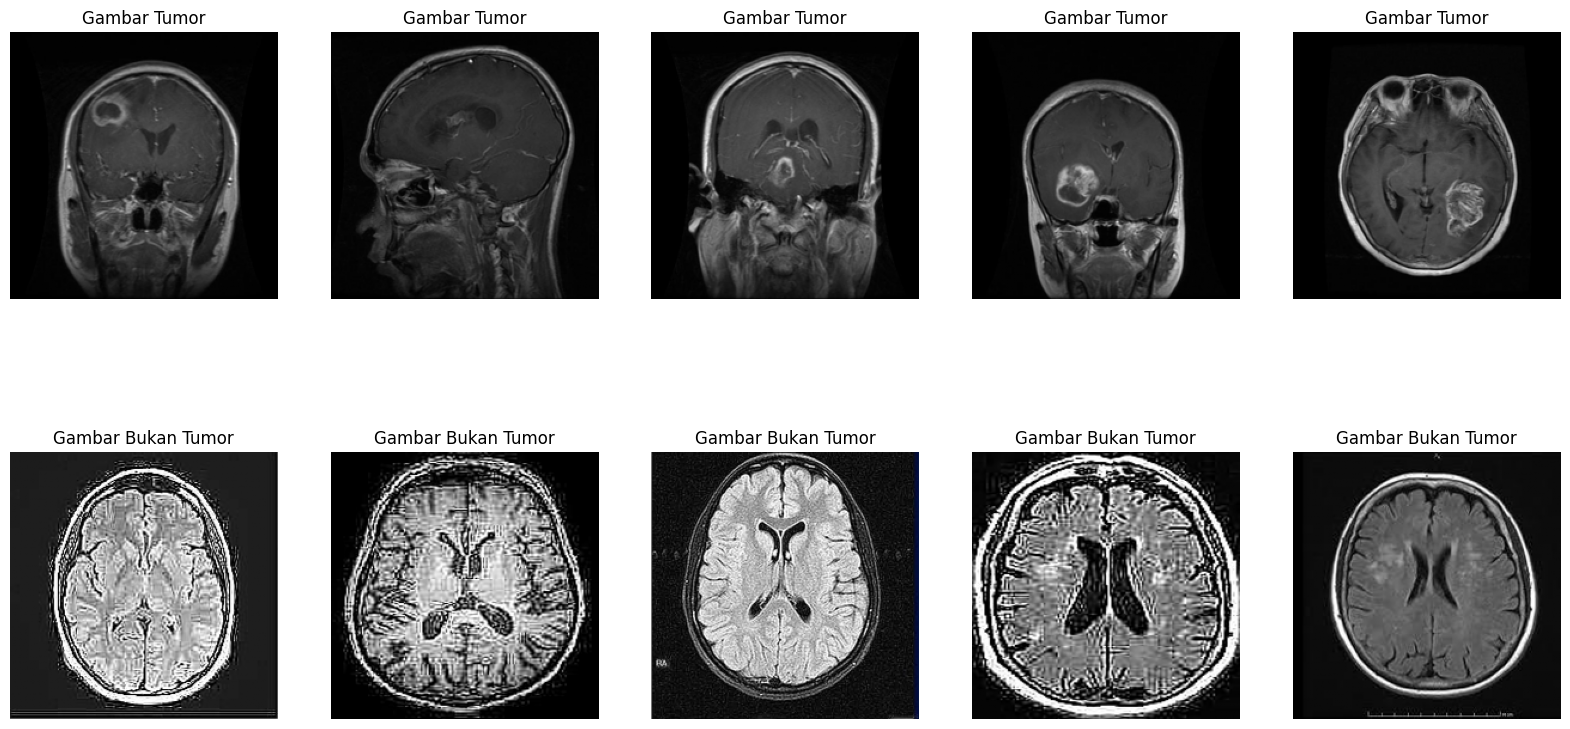

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(20,10))

for i in range(5):
  axes[0,i].imshow(tumor_images[i])
  axes[0,i].set_title('Gambar Tumor')
  axes[0,i].axis('off')

for i in range(5):
  axes[1,i].imshow(no_tumor_images[i])
  axes[1,i].set_title('Gambar Bukan Tumor')
  axes[1,i].axis('off')

plt.show()

In [5]:
len(tumor_images)

200

In [6]:
len(no_tumor_images)

200

# **Labelling**

Labelling image `tumor images` for `1`, `no tumor images` for `0`

In [7]:
def assign_labels(tumor_images, no_tumor_images):
  tumor_labels = np.ones(len(tumor_images))
  no_tumor_labels = np.zeros(len(no_tumor_images))
  return tumor_labels, no_tumor_labels
tumor_labels, no_tumor_labels = assign_labels(tumor_images, no_tumor_images)

In [8]:
tumor_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
no_tumor_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Gabung kedua data

In [10]:
data = tumor_images + no_tumor_images
labels = np.concatenate((tumor_labels, no_tumor_labels), axis=0)

In [11]:
data

[array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]),
 array([[[0.        , 0.        , 0.        ],
        

In [12]:
labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [13]:
# melihat dimensi data dan nilai rgb
data[0].shape

(224, 224, 3)

# **SPLITTING DATA**

In [14]:
X = np.array(data)
y = np.array(labels)

In [15]:
# split data dengan data training 80% dan data test 20%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

Menampilkan gambar dari data train beserta label

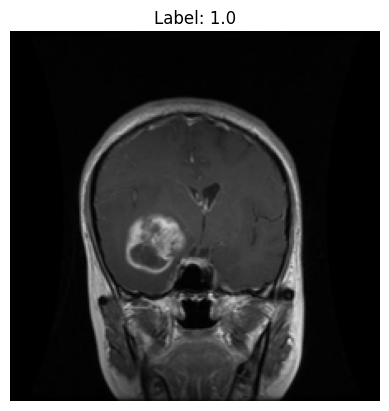

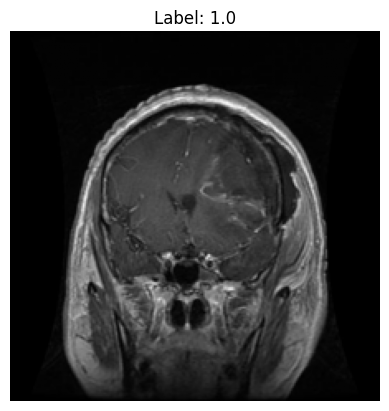

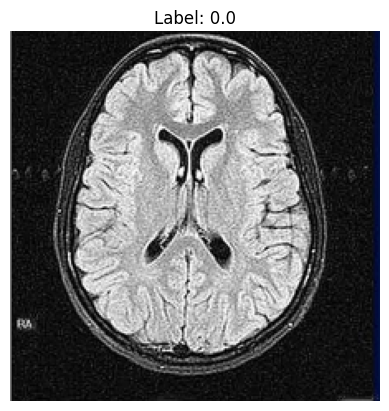

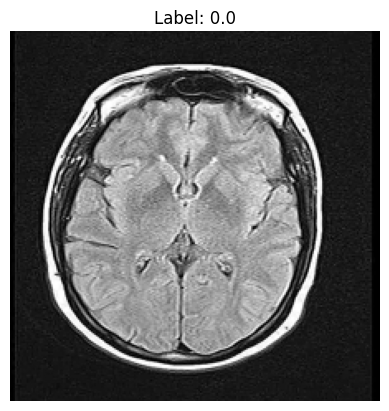

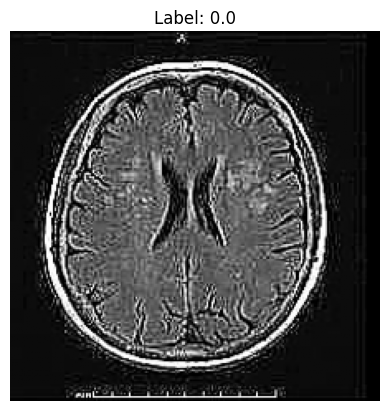

In [17]:
for image, label in train.take(5):
  plt.figure()
  plt.imshow(image.numpy())
  plt.title('Label: {}'.format(label.numpy()))
  plt.axis('off')
  plt.show()

Mengambil jumlah data train ke data validation

In [18]:
validation_size = int(0.1 * 400)
train = train.skip(validation_size)
val = train.take(validation_size)

In [19]:
BATCH_SIZE = 32
train = train.batch(BATCH_SIZE)
test = test.batch(BATCH_SIZE)
val = val.batch(BATCH_SIZE)

# **TRAINING DATA**

In [20]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape=(224, 224, 3), padding='valid'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 394272)            0         
                                                                 
 dense (Dense)               (None, 256)               100933888 
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                        

In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(train, validation_data = val, epochs = 10, verbose=1)

Epoch 1/10
9/9 [==============================] - 38s 4s/step - loss: 6.3997 - accuracy: 0.6214 - val_loss: 6.0124 - val_accuracy: 0.5250
Epoch 2/10
9/9 [==============================] - 32s 4s/step - loss: 2.2091 - accuracy: 0.7321 - val_loss: 0.4251 - val_accuracy: 0.8000
Epoch 3/10
9/9 [==============================] - 33s 4s/step - loss: 0.6505 - accuracy: 0.7893 - val_loss: 0.2658 - val_accuracy: 0.8750
Epoch 4/10
9/9 [==============================] - 34s 4s/step - loss: 0.2848 - accuracy: 0.8893 - val_loss: 0.1887 - val_accuracy: 0.9500
Epoch 5/10
9/9 [==============================] - 32s 4s/step - loss: 0.1661 - accuracy: 0.9393 - val_loss: 0.1487 - val_accuracy: 0.9500
Epoch 6/10
9/9 [==============================] - 33s 4s/step - loss: 0.1276 - accuracy: 0.9750 - val_loss: 0.1162 - val_accuracy: 0.9500
Epoch 7/10
9/9 [==============================] - 32s 4s/step - loss: 0.0799 - accuracy: 0.9893 - val_loss: 0.1014 - val_accuracy: 0.9500
Epoch 8/10
9/9 [==================

In [24]:
evaluation = model.evaluate(test)

3/3 [==============================] - 2s 465ms/step - loss: 0.2458 - accuracy: 0.8875


visualisasi perbandingan accuracy dengan validation accuracy

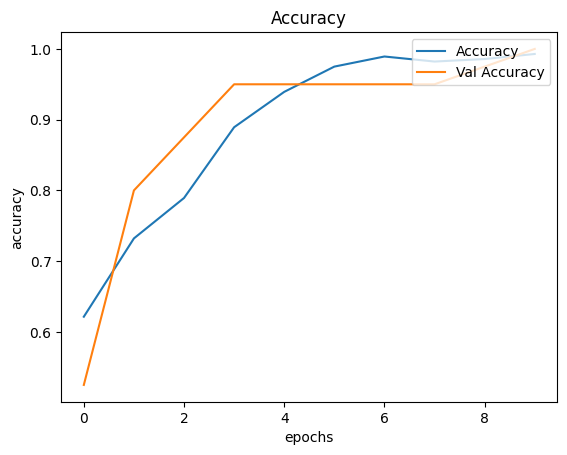

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Val Accuracy'], loc = 'upper right')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

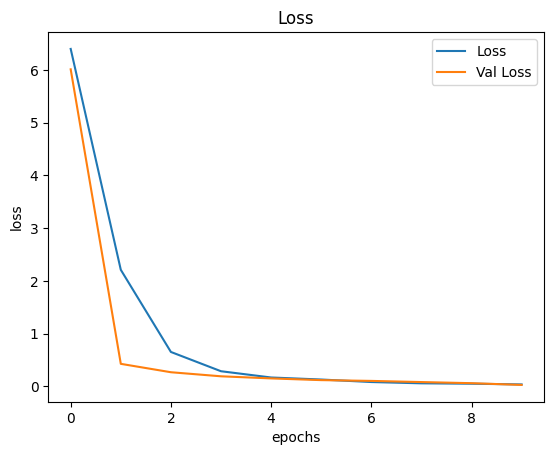

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Val Loss'], loc = 'upper right')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [27]:
model.save('/content/drive/MyDrive/Dataset_Brain_Tumor/prediksi_tumor.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **TESTING**

function extraction image

In [28]:
def load_upload_image(image_bytes):
  img = Image.open(io.BytesIO(image_bytes))
  img = img.resize((224,224))
  img_array = np.array(img)
  img_array = img_array/255.0
  return img_array

function prediction image

In [29]:
def predict_image(image_bytes):
  img_array = load_upload_image(image_bytes)
  img_array = np.expand_dims(img_array, axis=0)
  prediction = model.predict(img_array)
  if prediction[0][0] > 0.5:
    return "Tumor detected"
  else :
    return "No Tumor detected"

Saving Not Cancer  (791).jpg to Not Cancer  (791).jpg


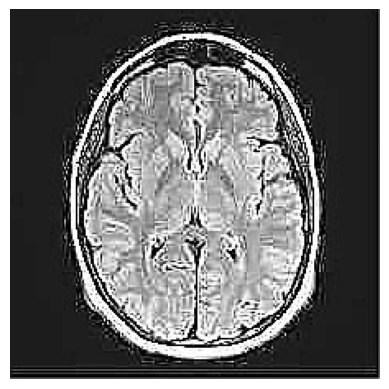

1/1 [==============================] - 0s 223ms/step
No Tumor detected


In [30]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image_bytes = uploaded[file_name]
img = Image.open(io.BytesIO(image_bytes))

plt.imshow(img)
plt.axis('off')
plt.show()

result = predict_image(image_bytes)
print(result)